### Load datasets

In [1]:
from data.data_preparation import get_model_df, get_users_df, get_items_df, get_categories
from model.model import RecommenderSystemModel
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df_interactions = get_model_df()
df_items = get_items_df(df_interactions)

Loading data...
    - Users loaded


/Users/javierus/Documents/Delft/Master Thesis/master_thesis/project/data/data_preparation.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 1. 1. ... 0. 0. 0.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_users_filtered.loc[:, "rating"] = df_users_filtered["rating"] / 5.0


    - Items loaded
    - Model dataframe ready. Interactions: 3369
Getting items dataframe...
    - Items dataframe ready. Items: 2439


In [3]:
df_users = get_users_df(df_interactions, df_items, 360, [5, 20, 50])

Getting users dataframe...
    - Users dataframe ready. Users: 100


In [6]:
from utils import normalize_vector

df_items["normalized_vector"] = df_items["vector"].apply(normalize_vector)


In [20]:
import numpy as np

df_items["max_position"] = df_items["normalized_vector"].apply(lambda x: np.argmax(x))
all_sums = df_items["max_position"].value_counts().reindex(range(0, 16), fill_value=0)

In [14]:
type(all_sums)

pandas.core.series.Series

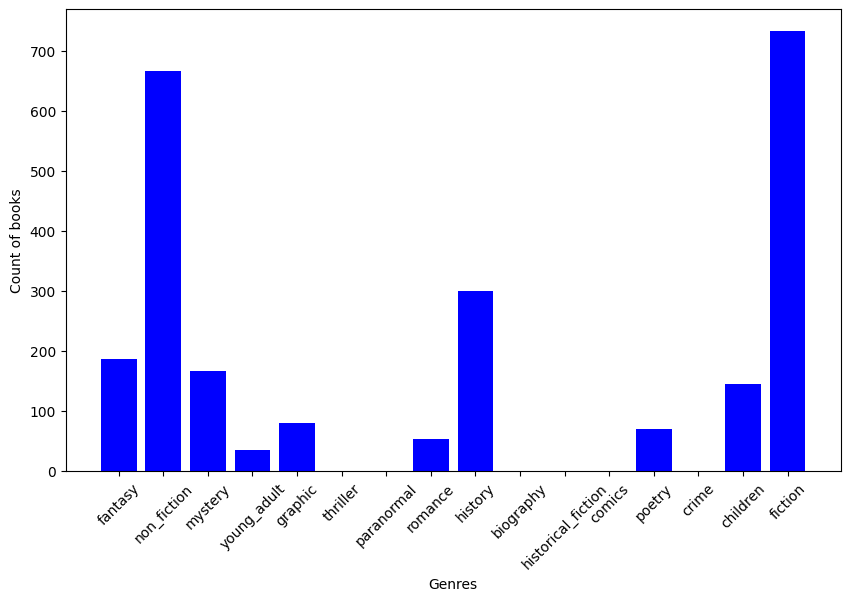

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(get_categories(), all_sums, color="blue")
plt.xlabel("Genres")
plt.ylabel("Count of books")
plt.xticks(rotation=45)
plt.show()

In [19]:
all_sums

max_position
0     187
1     666
2     167
3      36
4      80
5       0
6       0
7      54
8     300
9       0
10      0
11      0
12     71
13      0
14    146
Name: count, dtype: int64

In [5]:
df_users.head()

,is_reviewed,is_read,rating,book_id,vector
user_id,,,,,
2413,0.000000,114,0.823077,"{14859: 0.3099118836633818, 14839: 0.309911883...","[[34, 61, 25, 21, 9, 25, 34, 24, 66, 66, 66, 9..."
4856,0.000000,277,0.497003,"{1000: 0.3833610296025904, 66: 0.8355593997339...","[[109, 177, 90, 74, 50, 90, 109, 69, 200, 200,..."
16557,0.000000,87,0.449730,"{7433: 0.6174210974173361, 1001: 0.30633599935...","[[70, 74, 45, 52, 21, 45, 70, 30, 92, 92, 92, ..."
18936,0.041531,92,0.052563,"{6418: 0.23855851228023925, 6419: 0.3260143452...","[[384, 704, 345, 275, 160, 345, 384, 305, 775,..."
20075,0.119626,178,0.244112,"{87562: 0.3301209163883265, 51358: 0.813092850...","[[138, 238, 124, 110, 47, 124, 138, 118, 292, ..."


array([[<Axes: title={'center': 'fantasy'}>,
        <Axes: title={'center': 'non_fiction'}>,
        <Axes: title={'center': 'mystery'}>,
        <Axes: title={'center': 'young_adult'}>],
       [<Axes: title={'center': 'graphic'}>,
        <Axes: title={'center': 'thriller'}>,
        <Axes: title={'center': 'paranormal'}>,
        <Axes: title={'center': 'romance'}>],
       [<Axes: title={'center': 'history'}>,
        <Axes: title={'center': 'biography'}>,
        <Axes: title={'center': 'historical_fiction'}>,
        <Axes: title={'center': 'comics'}>],
       [<Axes: title={'center': 'poetry'}>,
        <Axes: title={'center': 'crime'}>,
        <Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'fiction'}>]], dtype=object)

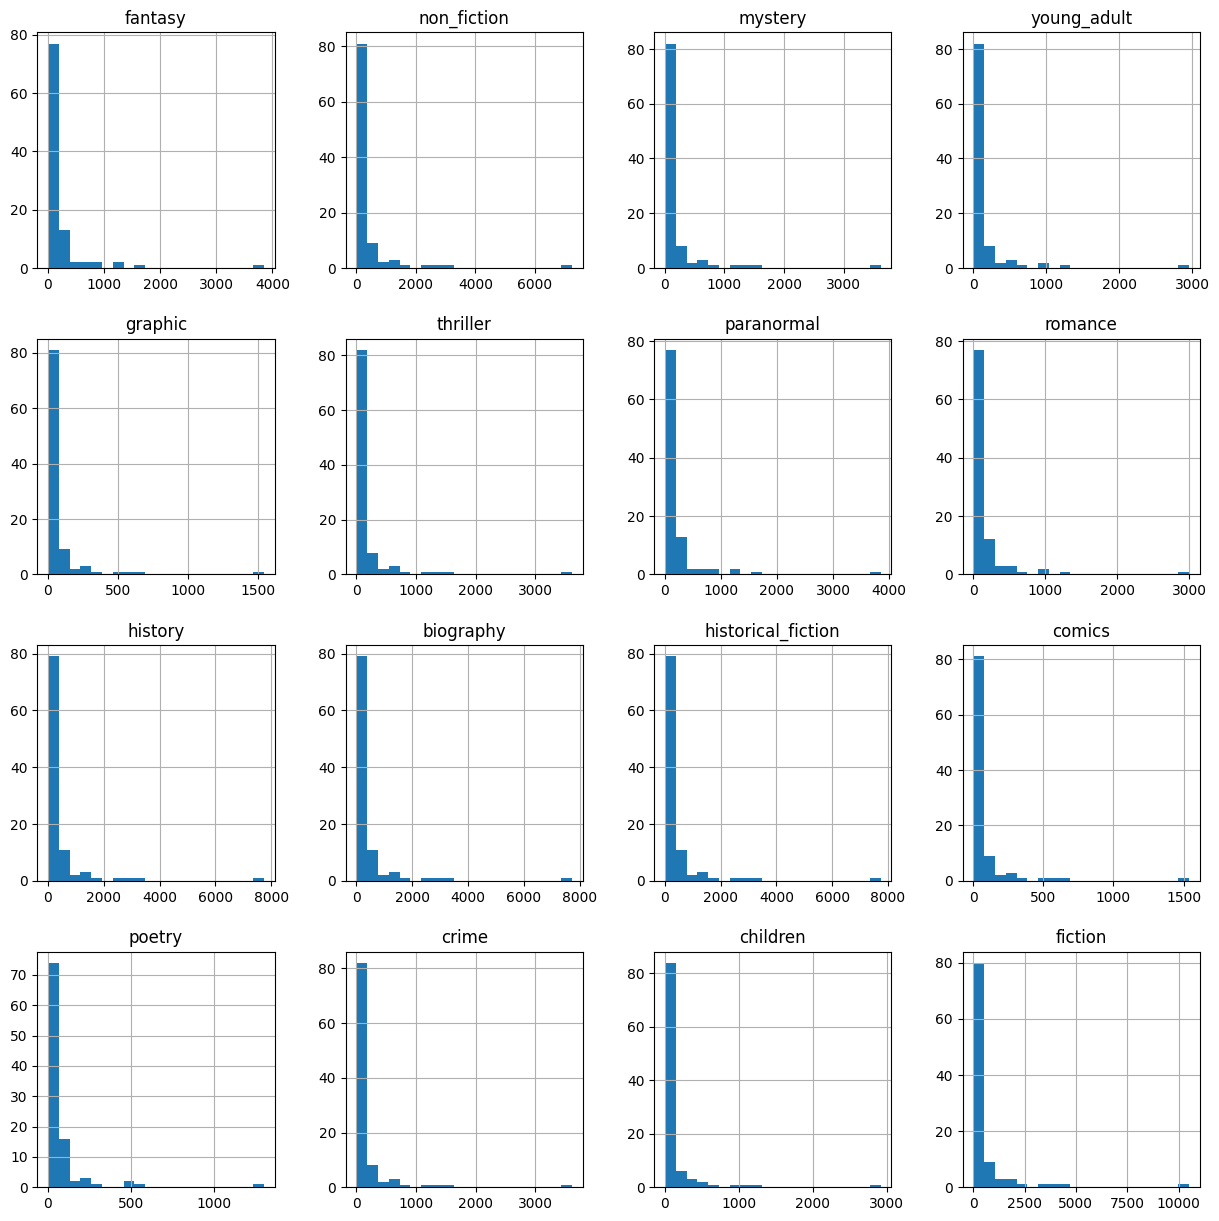

In [8]:
cat_cols = get_categories()
df_users[cat_cols].hist(bins=20, figsize=(15, 15))

In [2]:
rec_sys = RecommenderSystemModel(n_users=100, dummy=True)

Initializing model...

Loading data...
Dummy data read
Model dataframe ready. Interactions: 80167
Getting items dataframe...


/Users/javierus/Documents/Delft/Master Thesis/master_thesis/venv/lib/python3.12/site-packages/mesa/time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


Items dataframe ready. Items: 45564
Getting users dataframe...
Users dataframe ready. Users: 100
Creating user agents...
Users added.
Creating item agents...
Items added.
Finished model initialization.


In [3]:
rec_sys.run_model()

Step 1 executed.
Step 2 executed.
Step 3 executed.
Step 4 executed.
Step 5 executed.
Step 6 executed.
Step 7 executed.
Step 8 executed.
Step 9 executed.
Step 10 executed.


In [4]:
d = rec_sys.datacollector.get_agent_vars_dataframe()

In [5]:
d.dropna(inplace=True)

In [6]:
d["vector"] = d["vector"].apply(lambda x: x[0])
expanded_df = d["vector"].apply(pd.Series)

In [7]:
odf = expanded_df.xs(34, level=1)
odf.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Step,,,,,,,,,,,,,,,,
1,792,1332,714,585,323,714,792,558,1441,1441,1441,323,225,714,536,2036
2,792,1332,714,585,323,714,792,558,1441,1441,1441,323,225,714,536,2036
3,792,1332,714,585,323,714,792,558,1441,1441,1441,323,225,714,536,2036
4,792,1332,714,585,323,714,792,558,1441,1441,1441,323,225,714,536,2036
5,792,1332,714,585,323,714,792,558,1441,1441,1441,323,225,714,536,2036
6,792,1332,714,585,323,714,792,558,1441,1441,1441,323,225,714,536,2036
7,792,1332,714,585,323,714,792,558,1441,1441,1441,323,225,714,536,2036
8,792,1332,714,585,323,714,792,558,1441,1441,1441,323,225,714,536,2036
9,792,1332,714,585,323,714,792,558,1441,1441,1441,323,225,714,536,2036


In [11]:
odf[odf.index == 34]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
AgentID,,,,,,,,,,,,,,,,
34,794,1334,715,585,323,715,794,559,1443,1443,1443,323,225,715,536,2038


In [23]:
from model.agents import UserAgent

agents = [a for a in rec_sys.schedule.agents if isinstance(a, UserAgent)]
agent = agents[35]

In [9]:
import numpy as np
array = np.array([[1, 2, 3, 3, 3]])
print(np.ndarray.argmax(array))

2


In [2]:
from data.results import Results

r1 = Results()
r2 = Results()

Results directory created: 2024-04-11_1
Results directory created: 2024-04-11_2


In [1]:
import pandas as pd

df = pd.read_csv("/Users/javierus/Documents/Delft/Master Thesis/master_thesis/project/data/results/2024-04-24_3/initial_users_1.csv")

In [5]:
df["book_length"] = df["book_id"].apply(len)

<Axes: >

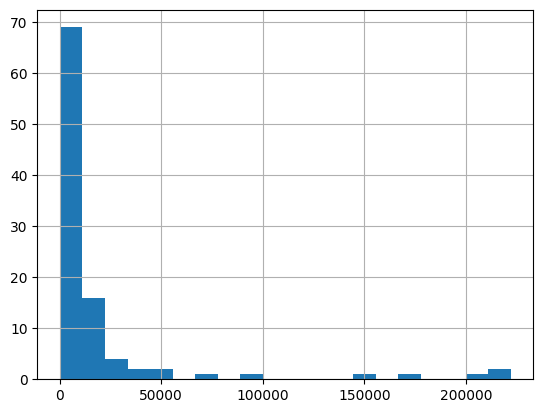

In [8]:
df["book_length"].hist(bins=20)